In [141]:
# Importando las bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
# Entendiendo los datos
df = pd.read_csv("preu lloguer per trimestre i barri.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


We are going to work just with the rental prices and not with the square feet prices, so we select them as:

In [143]:
df = df[df["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]

Now, let's analyze the values of price that are not numbers and after that let's convert the Price column to numeric.

In [144]:
df[df['Preu'] == '--'].head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),--
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),--
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),--


In [145]:
# converting price from object to numeric
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce') 
df[df['Preu'].isna()].head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN


Nom_Districte
Nou Barris             52
Horta-Guinardó         44
Sant Martí             40
Sants-Montjuïc         32
Sant Andreu            28
Eixample               24
Sarrià-Sant Gervasi    24
Gràcia                 20
Ciutat Vella           16
Les Corts              12
Name: count, dtype: int64


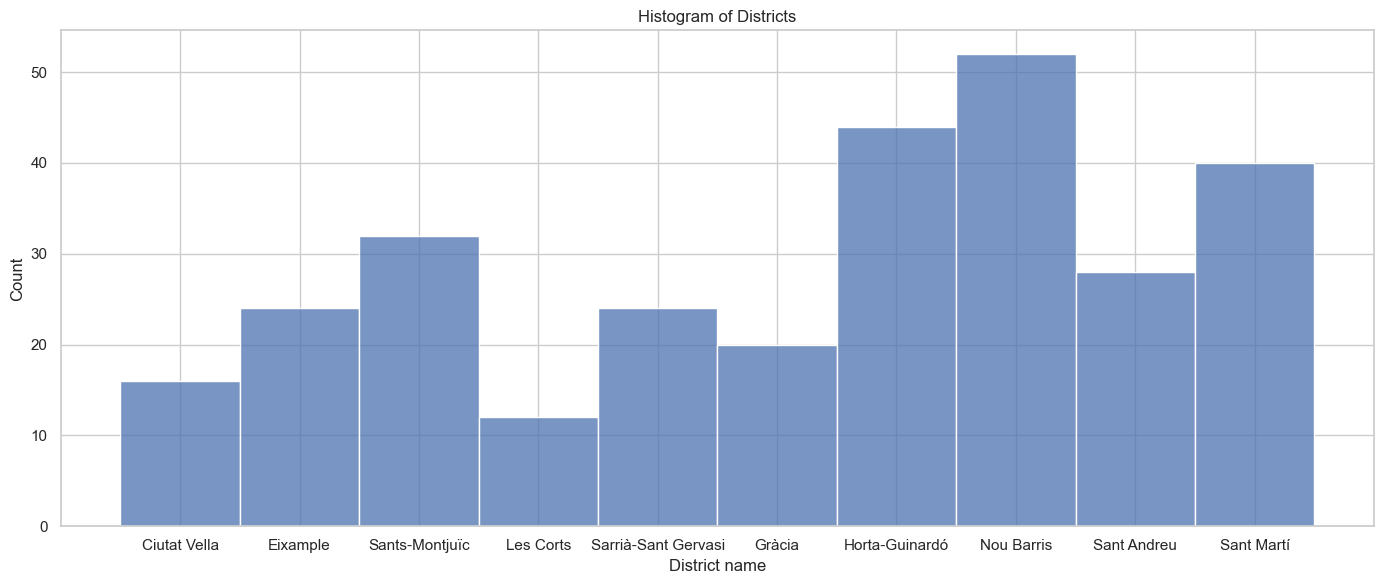

In [153]:
# Crea al menos una visualización para: una variable categorical (Barrio)
print(df['Nom_Districte'].value_counts())
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.histplot(df['Nom_Districte'])

plt.xlabel('District name')
plt.title('Histogram of Districts')

plt.tight_layout()
plt.savefig("1-Histogram of Districts")
plt.show()

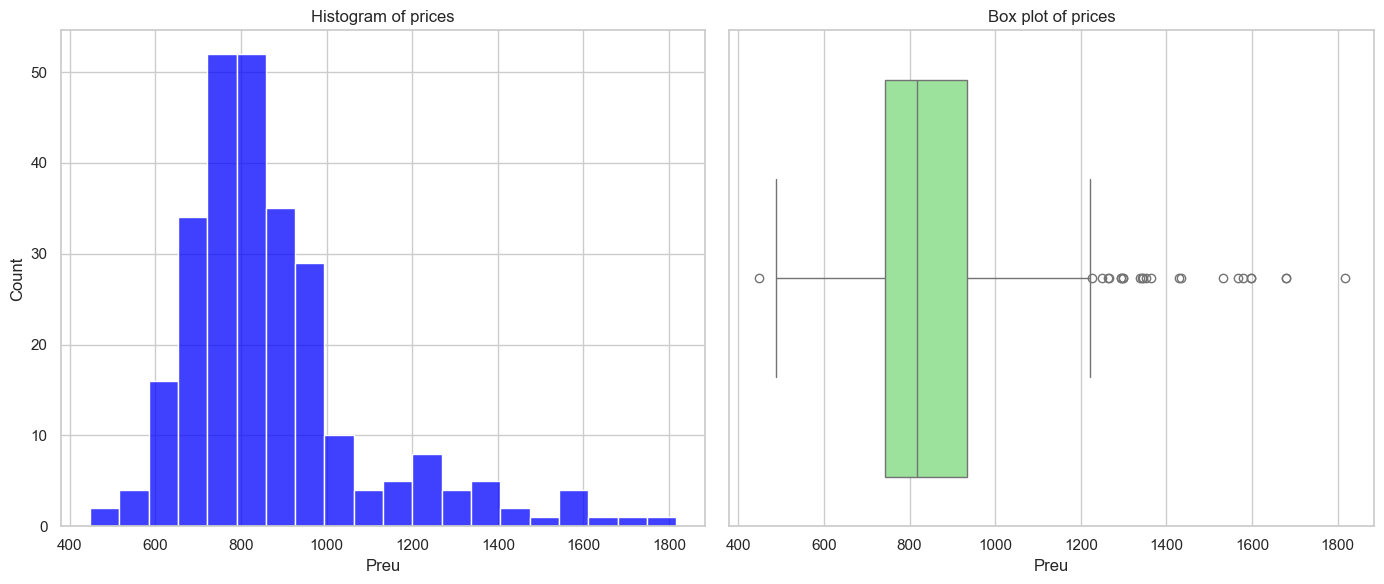

In [147]:
# Crea al menos una visualización para: una variable numérica (Preu)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Preu'], bins = 20, kde=False, color='blue')
plt.title('Histogram of prices')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Preu'], color='lightgreen')
plt.title('Box plot of prices')

plt.tight_layout()
plt.savefig("2-Histogram and box plot of prices")
plt.show()

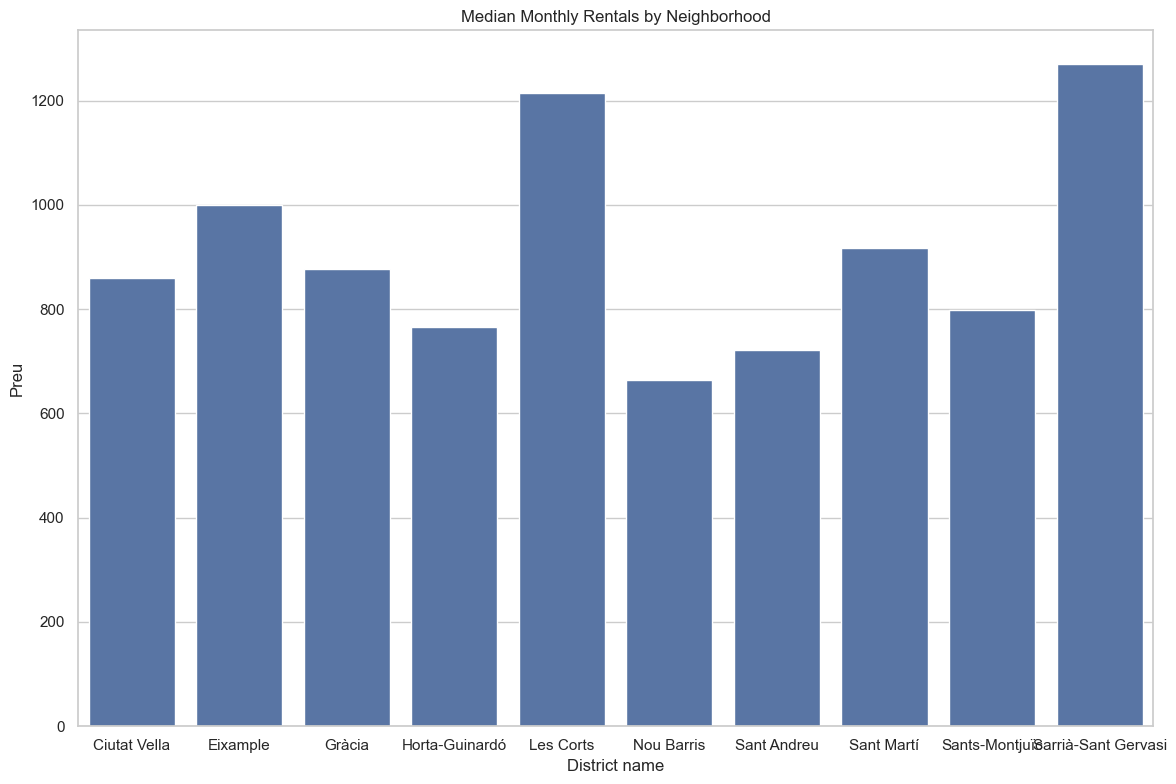

In [148]:
# Crea una visualización para una variable numérica y categórica (Distrito y Precio)
mean_rental_per_neighborhood = df.groupby('Nom_Districte')['Preu'].mean()
mean_rental_per_neighborhood = mean_rental_per_neighborhood.reset_index() # convert series to dataframe to seaborn

plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_Districte', y='Preu', data=mean_rental_per_neighborhood)
plt.xlabel('District name')
plt.title('Median Monthly Rentals by Neighborhood')
plt.tight_layout()
plt.savefig("3-Median Monthly Rentals by Neighborhood")
plt.show()

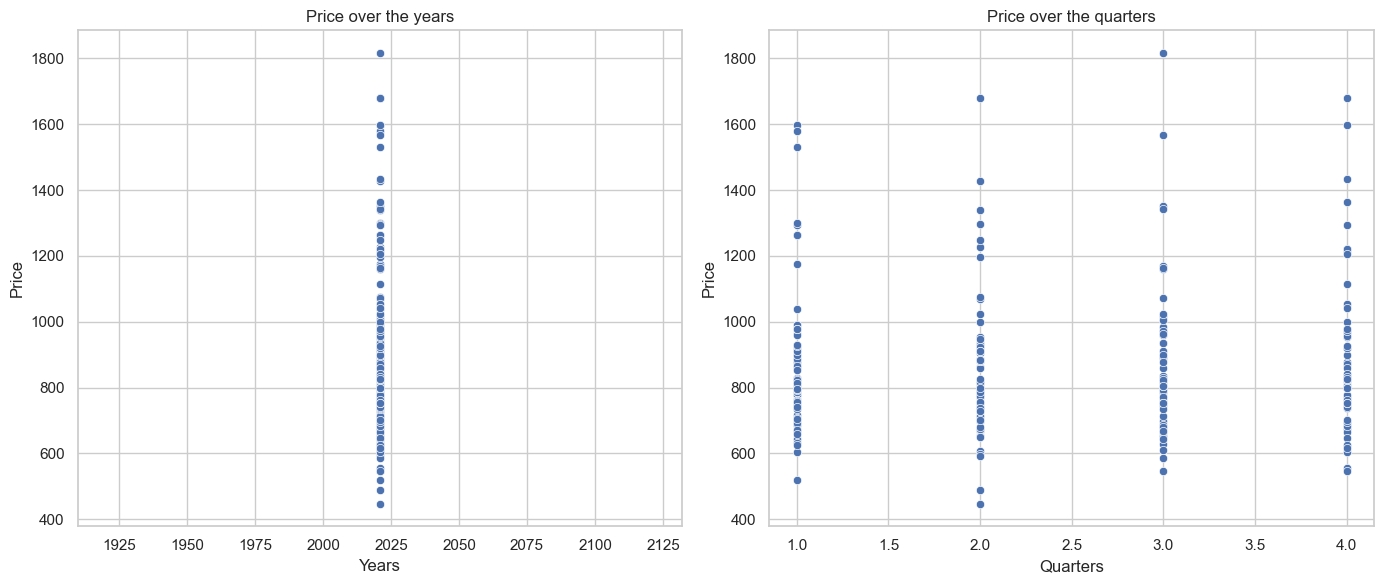

In [149]:
# Crea una visualización para dos variables numéricas (Año y Precio y Trimestre y Precio)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Any', y='Preu')
plt.xlabel('Years')
plt.ylabel('Price')
plt.title('Price over the years')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Trimestre', y='Preu')
plt.xlabel('Quarters')
plt.ylabel('Price')
plt.title('Price over the quarters')
plt.tight_layout()
plt.savefig("4-Price over the years and the quarters")
plt.show()



The graph above does not give much information, so we are going to plot a lineplot:

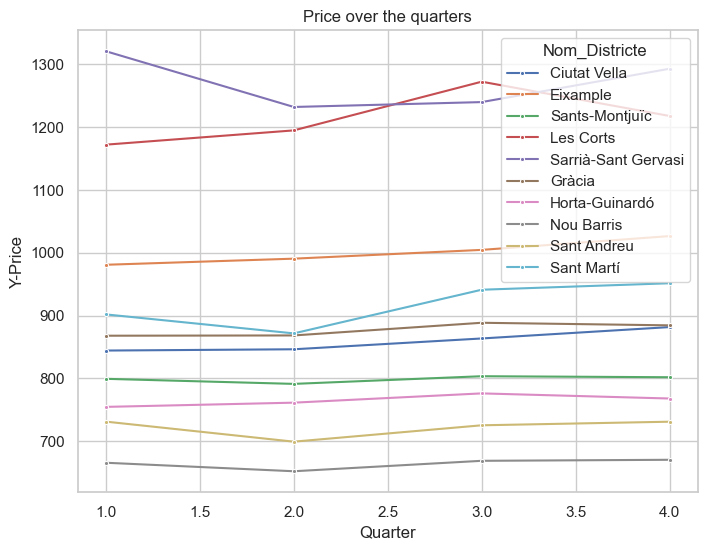

In [161]:
//TODO: plotar com e sem o confidence level e ver no codugo e documentacao que ci=none foi deprecated para errorbar=none
plt.figure(figsize=(8, 6))
sns.lineplot(x='Trimestre',
             y='Preu',
             hue='Nom_Districte', # Create n line plots according to labels in 'Nom_Districte'
             data=df,
             marker='.',
             errorbar=None
            )
plt.xlabel('Quarter') # x-axis name
plt.ylabel('Y-Price') # y-axis name
plt.title('Price over the quarters') # Add a title
plt.show() # Display the graph

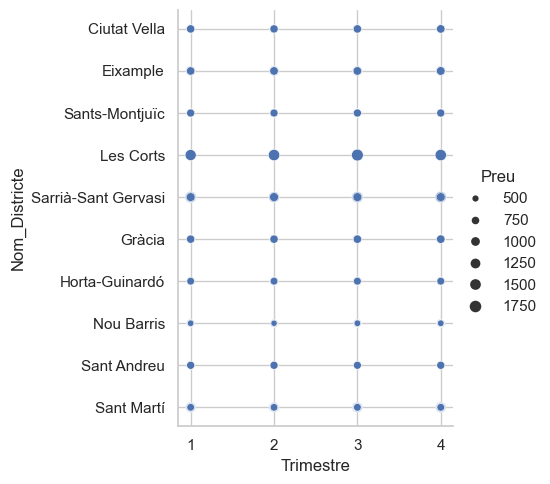

In [150]:
# Crea una visualización para tres variables (Distrito, Trimestre y Precio)
sns.relplot(data=df, x='Trimestre', y='Nom_Districte', size='Preu')
plt.savefig('5-District x Quarter x Price')


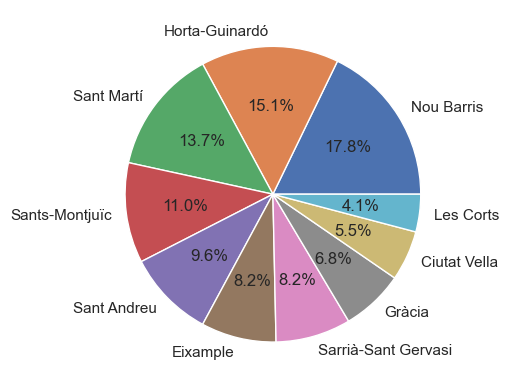

In [151]:
# Propone alguna visualización que creas que puede resultar interesante
# Pie chart of District quantaty
quantaty_districts = df['Nom_Districte'].value_counts()
plt.pie(quantaty_districts, labels=quantaty_districts.index, autopct='%1.1f%%')
plt.savefig('6-Pie chart of District quantaty')

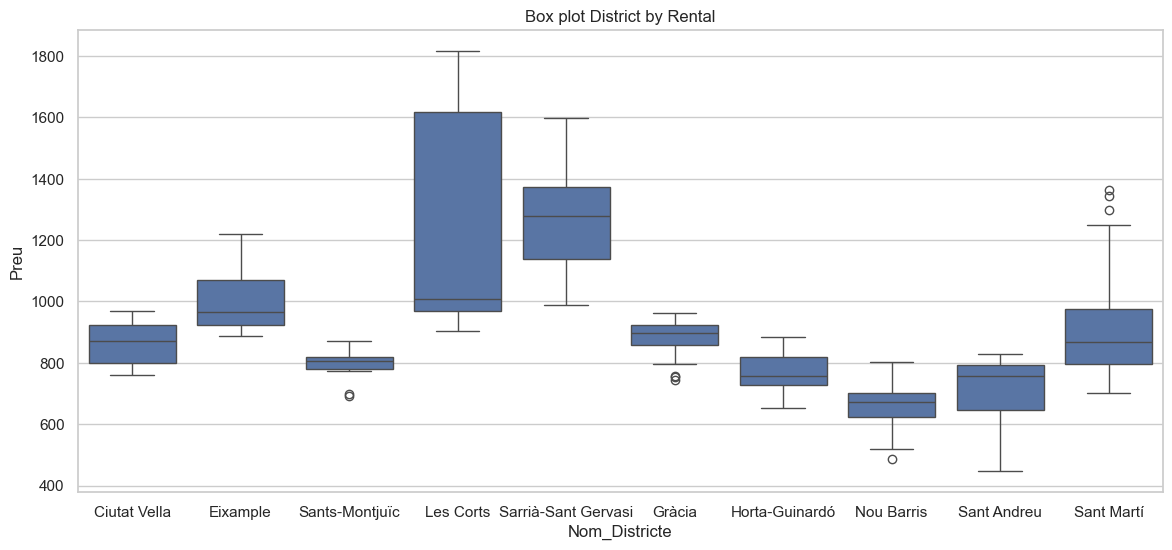

In [152]:
# Propone alguna visualización que creas que puede resultar interesante
# Box plot District by Rental
plt.figure(figsize=(14, 6))
plt.title('Box plot District by Rental')
sns.boxplot(data=df, x="Nom_Districte", y="Preu")
plt.savefig('7-Box plot District by Rental')

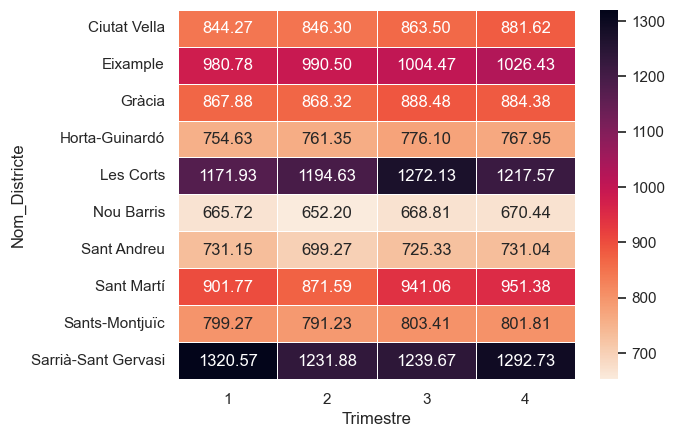

In [155]:
# Propone alguna visualización que creas que puede resultar interesante
# Heatmap
pivot_data = df.pivot_table(values='Preu', index='Nom_Districte', columns='Trimestre', aggfunc='mean')
ax=sns.heatmap(pivot_data, annot=True, fmt=".2f", linewidth=.5, cmap="rocket_r")
plt.savefig('8-Heatmap of price over quarters')